# Sentiment Analysis of Movie Reviews - Word2Vec

In [2]:
import pandas as pd
import numpy as np
import gensim

### Read Data

In [3]:
df = pd.read_pickle('reviews.pkl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
id                               25000 non-null object
sentiment                        25000 non-null int64
review                           25000 non-null object
review_preprocessed              25000 non-null object
review_preprocessed_tokenized    25000 non-null object
dtypes: int64(1), object(4)
memory usage: 976.6+ KB


## Word2Vec Model

Semantically similar words are mapped to nearby points ('are embedded nearby each other').

Theory: https://www.tensorflow.org/tutorials/word2vec
http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/


"The quick brown fox jumps over the lazy dog"

window = 1

[(The, brown), quick], [(quick, fox), brown], [(brown, jumps), fox], ... [context, target]

skip-gram invertext context and target and tries to predict each target word from its context word:

[quick, the], [quick, brown], [brown, quick], [brown, fox], ... [input, output]

Inline-style: 
![alt text](skip_gram_net_arch.png)

In [5]:
from gensim.models import Word2Vec

In [29]:
model = Word2Vec(df.review_preprocessed_tokenized, size=200, window=5, min_count=100, workers=4, iter=50)

In [30]:
vocab = list(model.wv.vocab)
X = model[vocab]

/home/jodahr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [31]:
model.most_similar('bad')

/home/jodahr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('horribl', 0.6743311882019043),
 ('terribl', 0.66948401927948),
 ('aw', 0.627508819103241),
 ('good', 0.6267939805984497),
 ('lousi', 0.5700424909591675),
 ('atroci', 0.557929277420044),
 ('stupid', 0.5549848079681396),
 ('poor', 0.5254800319671631),
 ('suck', 0.5194225907325745),
 ('lame', 0.5042637586593628)]

In [32]:
model.most_similar('father')

/home/jodahr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mother', 0.6992153525352478),
 ('son', 0.6838001012802124),
 ('husband', 0.5782538652420044),
 ('daughter', 0.5676370859146118),
 ('wife', 0.5605446696281433),
 ('parent', 0.5357836484909058),
 ('dad', 0.4980212450027466),
 ('famili', 0.47822242975234985),
 ('mom', 0.47310614585876465),
 ('sister', 0.4605206549167633)]

In [33]:
model.most_similar('queen')

/home/jodahr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('victoria', 0.38013479113578796),
 ('princess', 0.3772047758102417),
 ('elizabeth', 0.37114447355270386),
 ('girl', 0.33949047327041626),
 ('mari', 0.33687204122543335),
 ('emili', 0.3220159113407135),
 ('lust', 0.3139457702636719),
 ('bride', 0.3031172752380371),
 ('blond', 0.3014090359210968),
 ('grave', 0.2994152903556824)]

In [34]:
model.most_similar('king')

/home/jodahr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('hong', 0.3542308211326599),
 ('cinderella', 0.2906498908996582),
 ('dr', 0.28867843747138977),
 ('knight', 0.281598836183548),
 ('legend', 0.2754843235015869),
 ('slave', 0.27065083384513855),
 ('adapt', 0.26874402165412903),
 ('princ', 0.26818084716796875),
 ('warrior', 0.26709985733032227),
 ('princess', 0.26653045415878296)]

In [35]:
model.most_similar('man')

/home/jodahr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('woman', 0.6028185486793518),
 ('ladi', 0.45969027280807495),
 ('men', 0.4470260739326477),
 ('guy', 0.3857404291629791),
 ('son', 0.36796531081199646),
 ('boy', 0.3655182123184204),
 ('doctor', 0.34722399711608887),
 ('dude', 0.34527352452278137),
 ('father', 0.3429478108882904),
 ('partner', 0.3371719717979431)]

In [36]:
 model.most_similar(positive=['woman', 'king'], negative=['man'])

/home/jodahr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('queen', 0.30871760845184326),
 ('castl', 0.2980661392211914),
 ('princ', 0.29710087180137634),
 ('alic', 0.2887178361415863),
 ('slave', 0.2804417312145233),
 ('susan', 0.279171347618103),
 ('princess', 0.27723392844200134),
 ('ann', 0.2753872275352478),
 ('elizabeth', 0.2728729546070099),
 ('jean', 0.27211129665374756)]

## Visualize Word2Vec

In [37]:
from sklearn.manifold import TSNE

In [38]:
%%time
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

CPU times: user 1min 5s, sys: 4.07 s, total: 1min 9s
Wall time: 1min 9s


In [39]:
df_tsne = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

In [40]:
df_tsne.to_pickle('df_tsne.pkl')

In [41]:
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

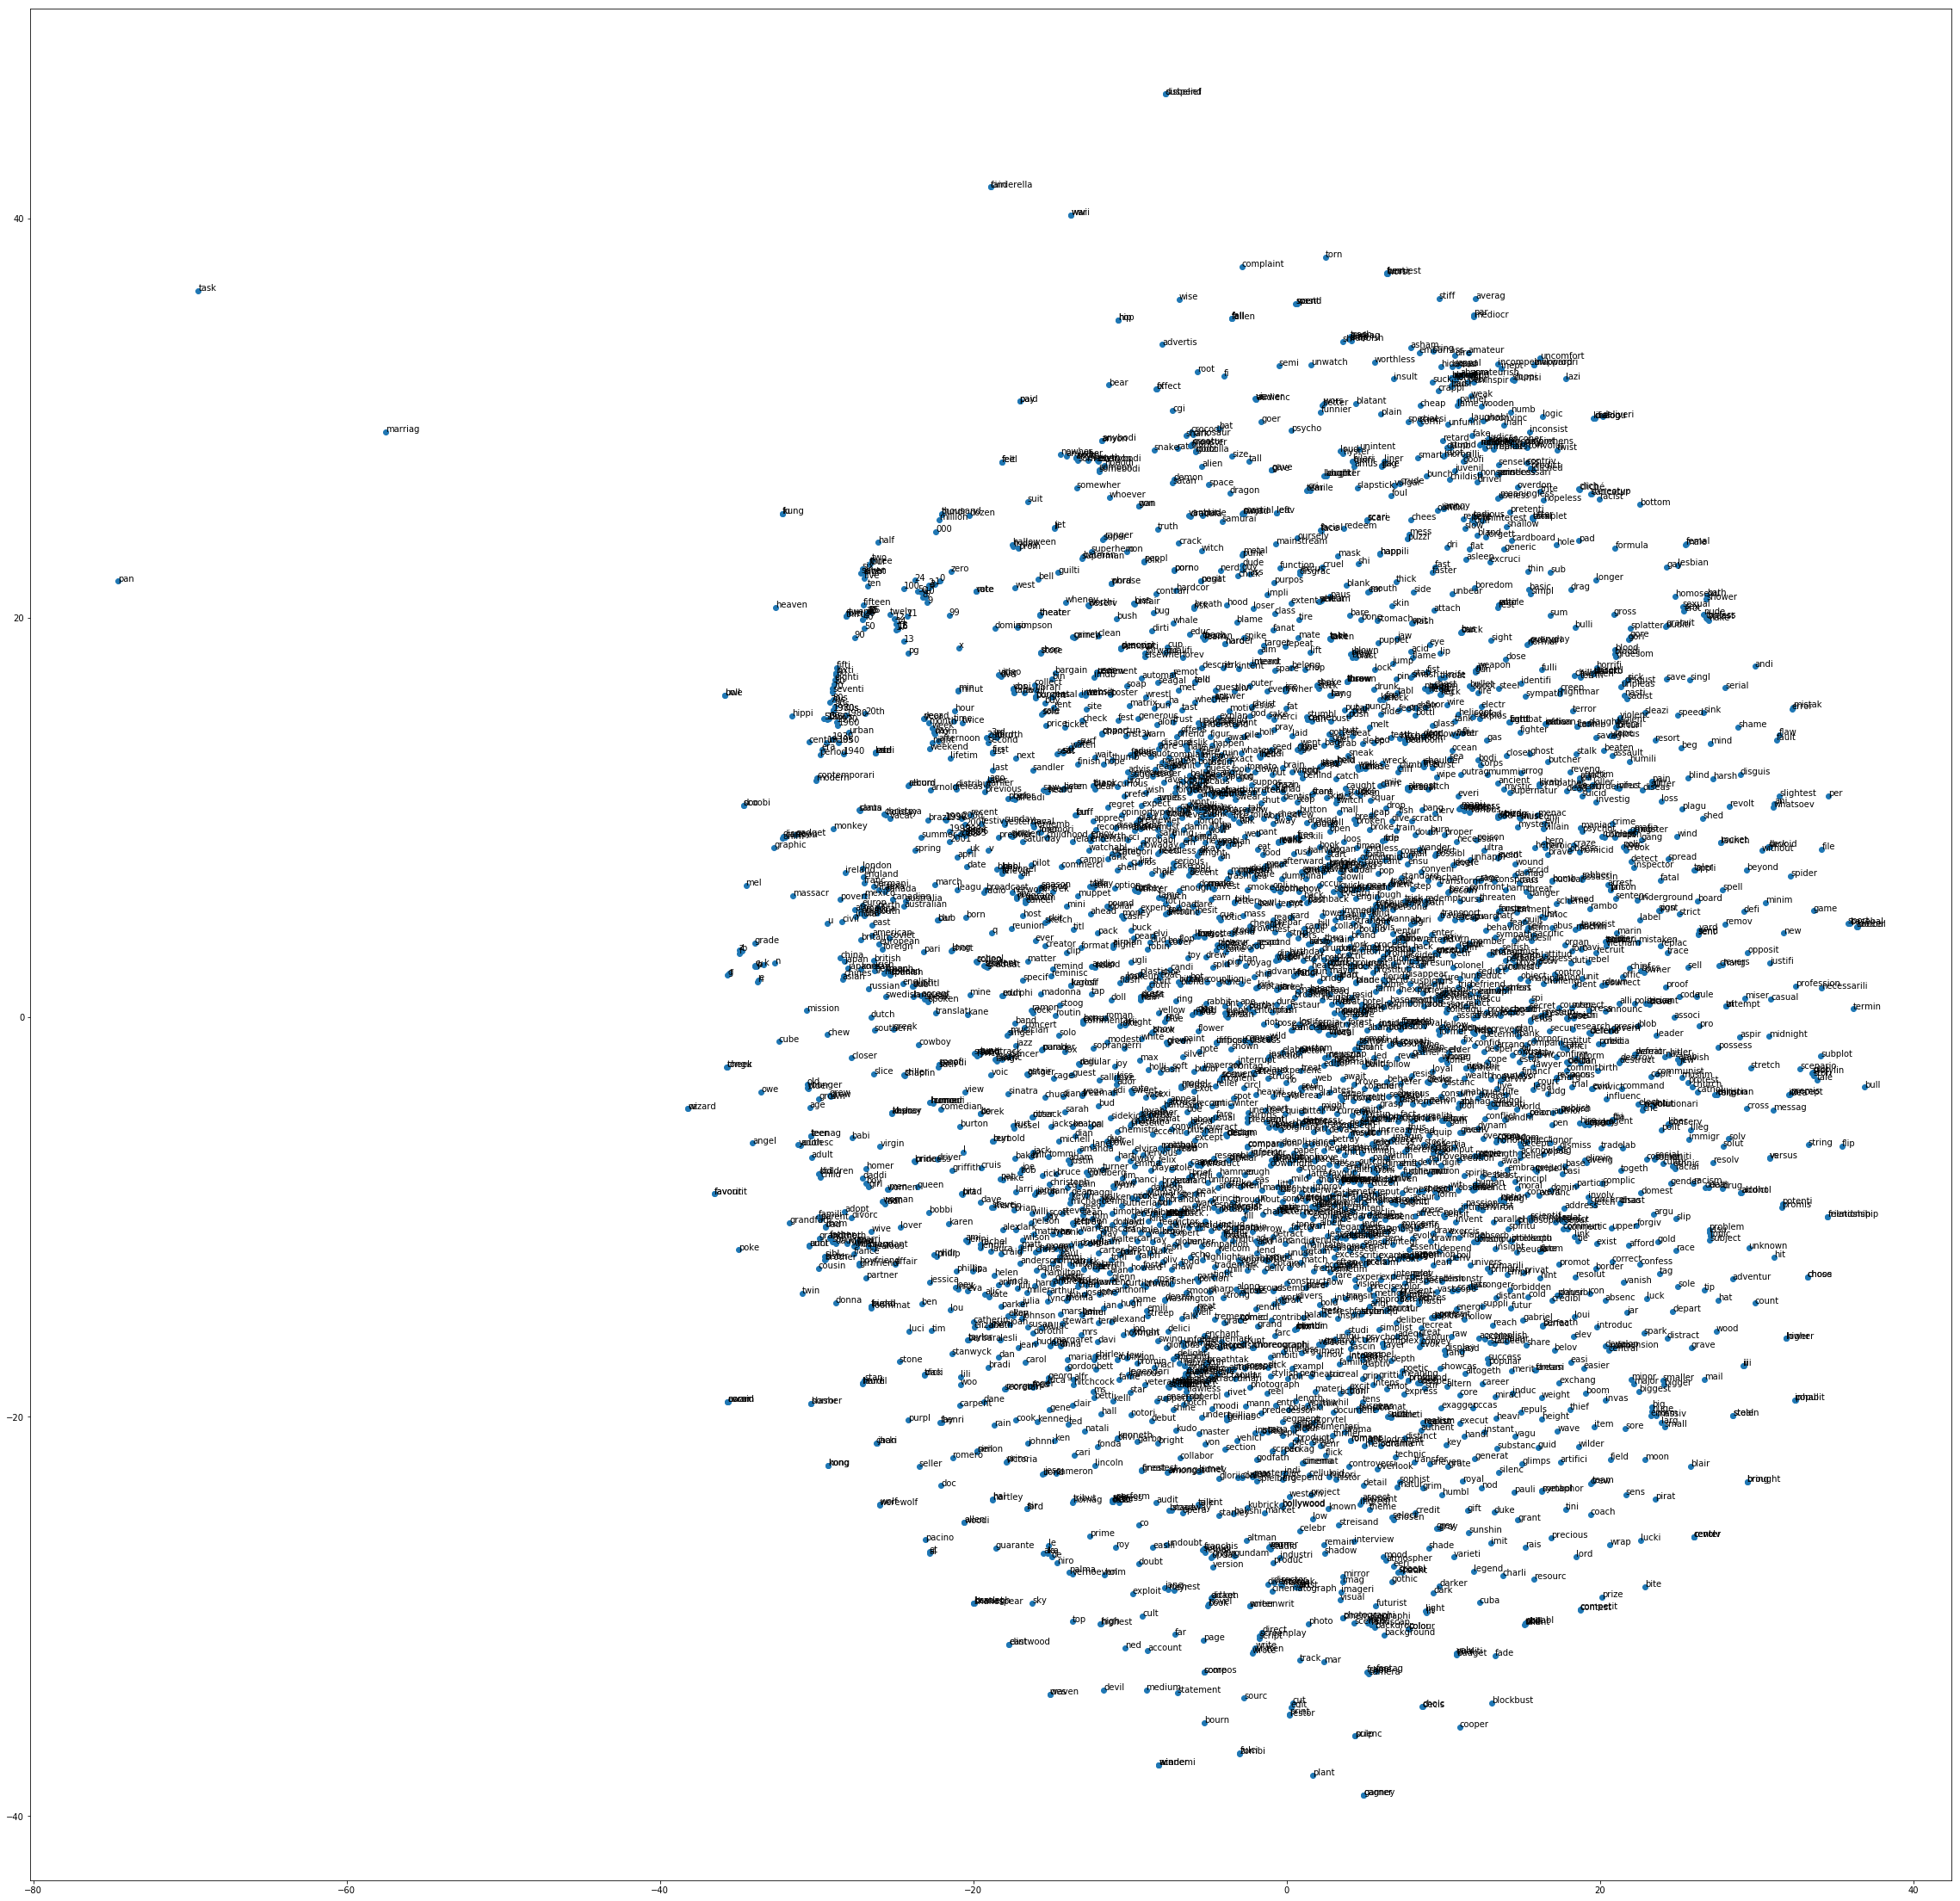

In [42]:
fig, ax = plt.subplots(figsize=(40,40))
ax.scatter(df_tsne['x'], df_tsne['y'])
for word, pos in df_tsne.iterrows():
    ax.annotate(word, pos)
fig.savefig('tsne_word2vec.pdf')

## Tfidf with WordEmbeddings
Next, we want to write our own Tfidf preprocessing. First, we compute the Tfidf weights for each word.

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer

In [44]:
tfidf = TfidfTransformer()
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(analyzer=lambda x:x)

In [47]:
tfidf_vectorizer.fit(df.review_preprocessed_tokenized)

TfidfVectorizer(analyzer=<function <lambda> at 0x7fe50abc9488>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l2',
        preprocessor=None, smooth_idf=True, stop_words=None,
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [48]:
pd.Series(tfidf_vectorizer.vocabulary_).head()

a    0
own     1
0        2
00       3
000      4
dtype: int64

In [78]:
from collections import defaultdict
#collections.defaultdict(int)

class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec, size):
        
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = size

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec, size):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = size

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [52]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

/home/jodahr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [77]:
len(w2v['york'])

200

In [53]:
w2v_df = pd.DataFrame(w2v)
w2v_df.head()

,0,000,1,10,100,11,12,13,14,15,...,york,young,younger,youth,z,zero,zombi,zone,,’
0,1.118858,-0.325540,-0.382677,0.352458,-0.275803,-1.887635,0.403600,-1.535316,-0.137168,-1.270149,...,2.995230,0.359125,0.202366,1.401256,0.101968,1.012026,2.188500,0.999412,1.025886,-0.948581
1,1.914089,2.156181,1.952382,1.363245,0.780128,0.476265,-0.248907,-0.689262,-0.489589,-0.311237,...,2.895351,-0.450104,-2.236625,-0.677089,-0.217448,0.174267,1.769508,-0.298381,0.630743,0.423752
2,-1.274830,1.373224,0.250646,0.380802,-0.209148,1.380091,1.895663,2.352734,1.812290,2.982149,...,-1.697658,0.718074,1.382014,0.897791,-0.529987,-0.291138,-0.739574,-0.633566,-1.345066,0.891548
3,-1.740705,-1.941703,-0.569427,-2.488479,-1.981467,0.779734,-0.244357,-0.466546,-0.473474,-0.296335,...,1.338672,3.394209,1.105537,2.342583,0.221241,0.976975,-1.374004,1.539230,-0.838469,-0.758107
4,-2.533386,-2.622437,-2.248623,-2.712973,-1.219784,-2.614276,-3.219969,-0.593746,0.131443,-1.264441,...,-0.463939,0.342866,-1.152148,0.437611,-0.046674,-2.674691,1.541673,2.175538,0.514709,0.222715


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df.review_preprocessed, df.sentiment, test_size=0.2, random_state=42)

In [79]:
pipe = Pipeline([
    ('w2v', MeanEmbeddingVectorizer(w2v, 200)),
    ('scaler', MinMaxScaler()),
    ('bayes', MultinomialNB())
])

In [80]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('w2v', <__main__.MeanEmbeddingVectorizer object at 0x7fe4cd2374a8>), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('bayes', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [81]:
pipe.score(X_test, y_test)

0.5888

In [456]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer=lambda x:x)),
    ('bayes', MultinomialNB())
])

In [457]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer=<function <lambda> at 0x7ff62607e7b8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l2',
      ...e,
        vocabulary=None)), ('bayes', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [458]:
pipe.score(X_test, y_test)

0.86119999999999997